<a href="https://colab.research.google.com/github/audreychela/Audrey_first_repo/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,auc, roc_auc_score

In [2]:
#load and read
data = pd.read_csv("churn.csv")
data[:5]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#ccheck shape
data.shape

(10000, 14)

In [4]:
#check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#check the missing values
data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
#check duplicates
data.duplicated().sum()

np.int64(0)

In [25]:
#unnessary columns
coln_un = data[['RowNumber', 'CustomerId', 'Surname']]

#drop the 3 columns
data.drop(coln_un, axis=1, inplace=True)
data.head()

KeyError: "None of [Index(['RowNumber', 'CustomerId', 'Surname'], dtype='object')] are in the [columns]"

In [8]:
#preocess the cat colns

cat = data.select_dtypes("object")
cat_dumm = pd.get_dummies(cat, drop_first=True, dtype="int")
cat_dumm

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [9]:
#merge the encoded set to the original df

merged_df = pd.concat([data, cat_dumm], axis=1)
merged_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [10]:
#Remove the original columns
merged_df.drop(cat, axis=1, inplace=True)
merged_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
#checking the label class records
merged_df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [12]:
#seperate features from label
X = merged_df.drop("Exited", axis=1)
y = merged_df["Exited"]

In [13]:
#Divide the df into training and test set
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

#check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 11), (8000,), (2000, 11), (2000,))

In [14]:
#scale the features#bimcoperate this code and redo the modeling during your free time
#ss = StandardScaler()
#x_train_tr =ss.fit_transform(x_train)
#x_test_tr = ss.transform(x_test)

In [15]:
#create the model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [16]:
#train score
lr.score(x_train, y_train)

0.8065

In [17]:
#predict
y_pred = lr.predict(x_test)

In [18]:
result = {"Actual": y_test, "Predicted": y_pred}

pd.DataFrame(result)

,Actual,Predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
6412,1,1
8285,0,0
7853,1,0
1095,1,0


## Classification metrics

In [19]:
#model performamce Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8105

In [20]:
#check confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1532,   75],
       [ 304,   89]])

''

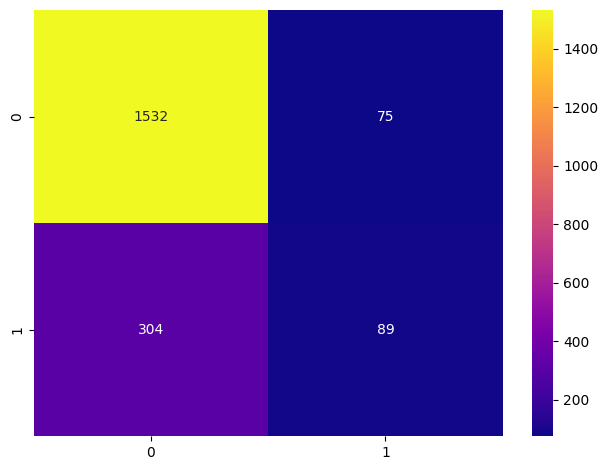

In [21]:
#visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="plasma")
plt.tight_layout()
;

In [22]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1607
           1       0.54      0.23      0.32       393

    accuracy                           0.81      2000
   macro avg       0.69      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



In [23]:
#roc score

roc_auc_score(y_test, y_pred)

np.float64(0.5898961445710639)

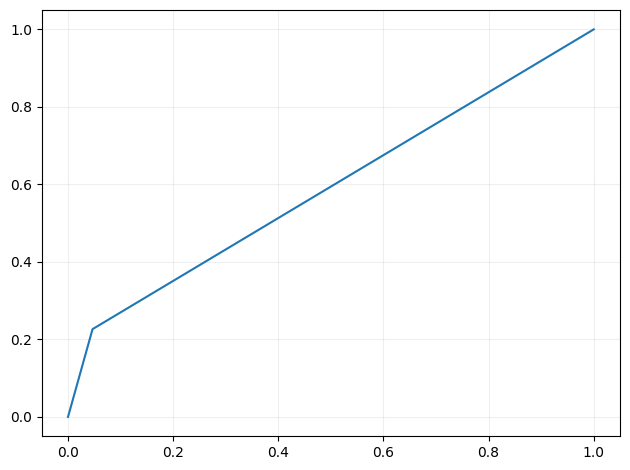

In [24]:
#AUC
fpr,tpr,threshold = roc_curve(y_test, y_pred)


#plot
plt.plot(fpr, tpr)
plt.grid(alpha=.2)
plt.tight_layout();

DEALING WITH IMBALANCE

In [27]:
#Dataframe to be used
merged_df.columns = merged_df.columns.str.lower()

merged_df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [28]:
#visualise thetable
exited_ = merged_df["exited"].value_counts(ascending=False)
exited_

,count
exited,
0,7963
1,2037


In [ ]:
x_s = sm.fit_resample(merged_df)

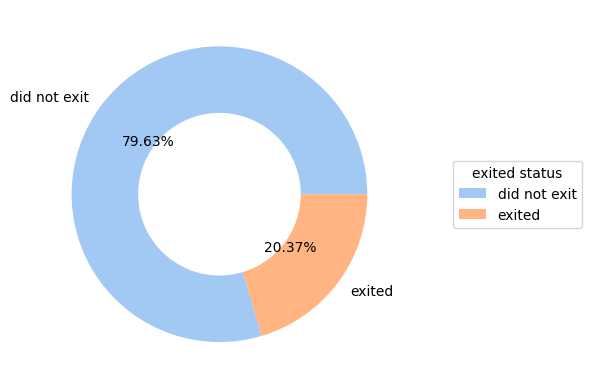

In [33]:
#visualise the above
color = sns.color_palette("pastel")
lab = ["did not exit", "exited"]
plt.pie(exited_, labels=lab,colors=color, autopct="%.2f%%", wedgeprops=dict(width=.45))
plt.legend(title="exited status", loc = "center right", bbox_to_anchor=(1,0, 0.5,1))

In [35]:
#Divide the df into training and test set
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

#check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 11), (8000,), (2000, 11), (2000,))

In [39]:
#rectify class imbalance using SMOTE (resampling technique, )
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train)
x_train_s.shape

(12712, 11)

In [40]:
model3 = LogisticRegression()
model3.fit(x_train_s, y_train_s)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
#checking training score
model3.score(x_train_s, y_train_s)

0.6817967275015733

In [43]:
#predict
y_pred = model3.predict(x_test)


In [45]:
#accuracy prediction
accuracy_score(y_test, y_pred)

0.6505

In [48]:
#matrix
conf=confusion_matrix(y_test, y_pred)
conf

array([[1053,  554],
       [ 145,  248]])

<Axes: >

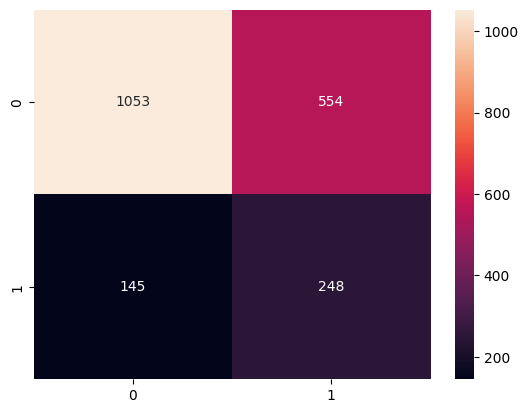

In [50]:
#visualize
sns.heatmap(conf, fmt=".0f", annot=True)

In [59]:
#classification rep
print(classification_report = (y_test, y_pred))

TypeError: 'classification_report' is an invalid keyword argument for print()